In [1]:
# Modeling Biological Networks Assignment
# Jan Sternagel, 102177941
import numpy as np
import pandas as pd
import pysindy as ps
from ipywidgets import interact

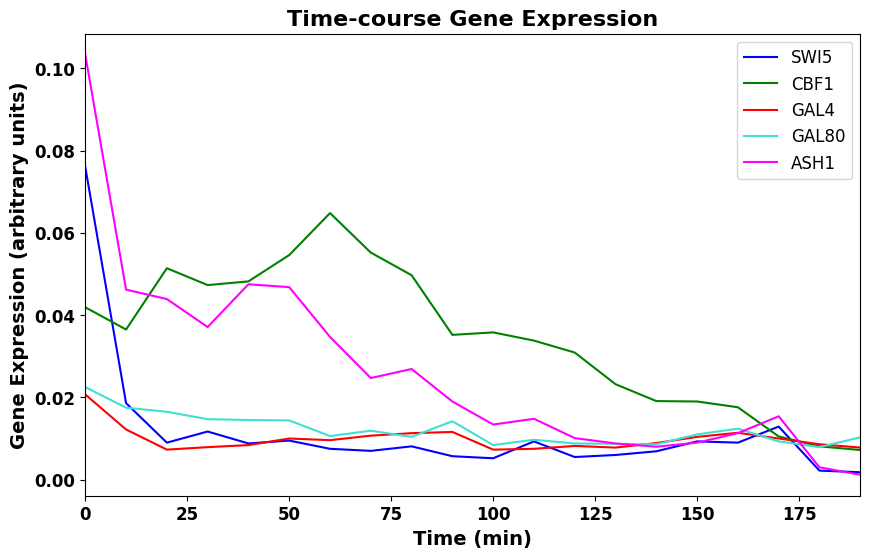

In [2]:
from src.commons import read_data
from src.visuals import show_gene_expression_over_time_in_one_plot

t, data_gen_exp_t = read_data('data/data_original.json')

dt = 10  # min
max_time = max(t)

t_data = np.array(t)
x_true = np.array(list(data_gen_exp_t.values())).T

show_gene_expression_over_time_in_one_plot(t, data_gen_exp_t)

# Relevance Networks

In [3]:
from src.relevance_network import compute_mutual_info_matrix

# Start with Relevance Network
df = pd.DataFrame(data_gen_exp_t)

# Calculate correlation matrix
correlation_matrix = df.corr()
mi_matrix = compute_mutual_info_matrix(df)

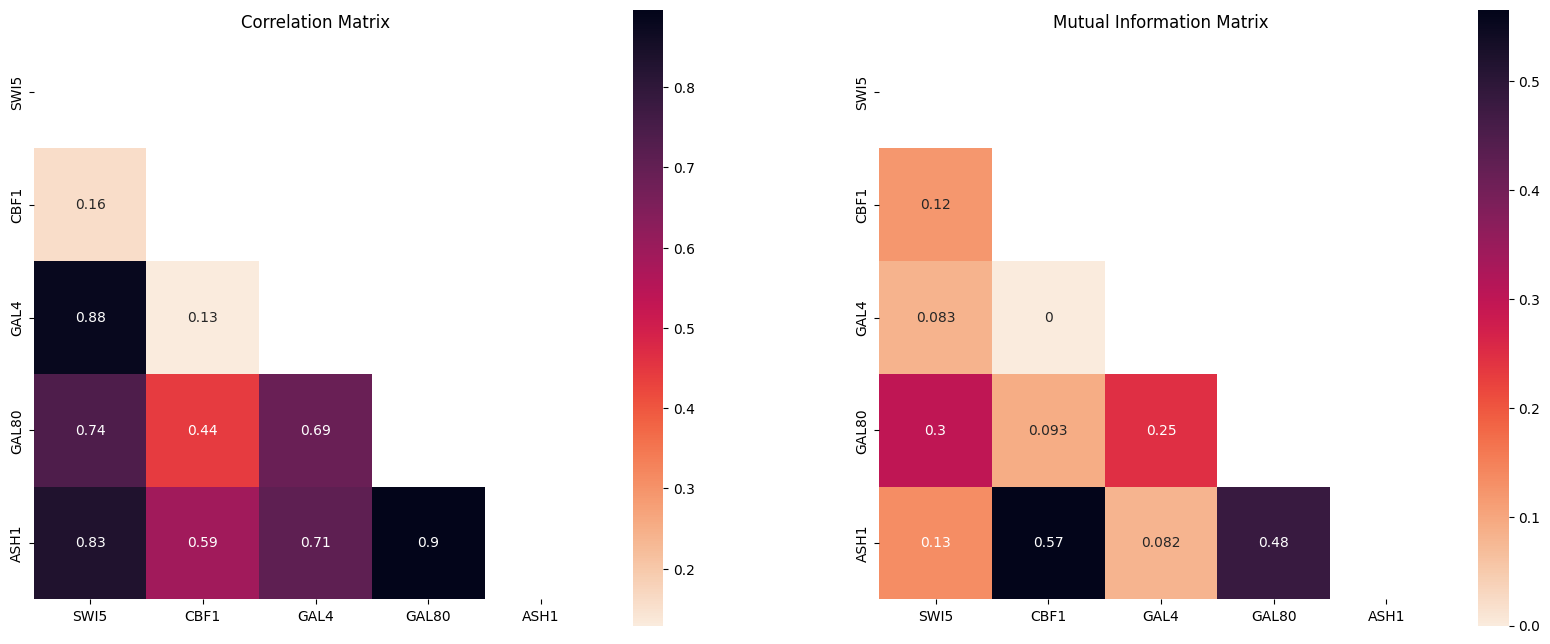

In [4]:
from src.visuals import plot_corr_and_mi_matrices

plot_corr_and_mi_matrices(correlation_matrix, mi_matrix)

In [13]:
mi_matrix

,SWI5,CBF1,GAL4,GAL80,ASH1
SWI5,1.618573,0.119988,0.082503,0.300297,0.134461
CBF1,0.119988,1.714406,0.000000,0.092610,0.565948
GAL4,0.082503,0.000000,1.585240,0.246986,0.081546
GAL80,0.300297,0.092610,0.246986,1.697740,0.479882
ASH1,0.134461,0.565948,0.081546,0.479882,1.714406


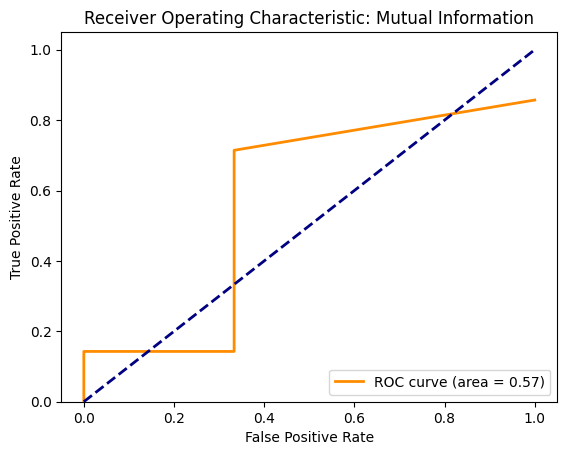

In [46]:
# aracne algorithm
from src.relevance_network import apply_aracne
import seaborn as sns
from src.visuals import plot_roc
from src.commons import calculate_confusion_matrix_from_model, apply_threshold


thresholds = np.linspace(0.0, 1.0, 20)
dpi_threshold = 0.
tprs, fprs = [], []
for th in thresholds:
    #aracne_matrix = apply_aracne(mi_matrix=mi_matrix, threshold=th, dpi_threshold=dpi_threshold)
    matrix_filtered = apply_threshold(mi_matrix, th)
    fpr, tpr = calculate_confusion_matrix_from_model(matrix_filtered, compare_aginst_switch_off_sereies=False, undirected_model=True)
    
    fprs.append(fpr)    
    tprs.append(tpr)

plot_roc(fprs, tprs, "Receiver Operating Characteristic: Mutual Information")

# mask = np.triu(np.ones_like(mi_matrix, dtype=bool))
# sns.heatmap(aracne_matrix, mask=mask, annot=True, square=True, cmap=sns.color_palette("rocket_r", as_cmap=True))

In [45]:
tprs

[0.2857142857142857,
 0.2857142857142857,
 0.42857142857142855,
 0.42857142857142855,
 0.42857142857142855,
 0.2857142857142857,
 0.14285714285714285,
 0.14285714285714285,
 0.14285714285714285,
 0.14285714285714285,
 0.14285714285714285,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

In [9]:
fprs

[0.6666666666666666,
 0.6666666666666666,
 0.3333333333333333,
 0.3333333333333333,
 0.3333333333333333,
 0.3333333333333333,
 0.3333333333333333,
 0.3333333333333333,
 0.3333333333333333,
 0.3333333333333333,
 0.3333333333333333,
 0.3333333333333333,
 0.3333333333333333,
 0.3333333333333333,
 0.3333333333333333,
 0.3333333333333333,
 0.3333333333333333,
 0.3333333333333333,
 0.3333333333333333,
 0.3333333333333333]

(0.0, 1.5)

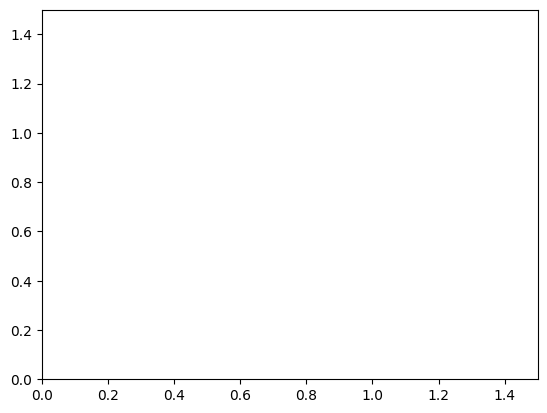

In [12]:
import matplotlib.pyplot as plt
plt.figure()
lw = 2
plt.plot(fprs, tprs, color='darkorange',
         lw=lw)
# add the random line
# plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.5])
plt.ylim([0.0, 1.5])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver Operating Characteristic')
# plt.legend(loc="lower right")
# plt.show()


In [10]:
from src.visuals import plot_relevance_graph
from matplotlib import pyplot as plt


@interact(threshold=(0.0, 1.0))
def widget_plot(threshold):
    fig, axs = plt.subplots(1, 2, figsize=(16, 7))  # Create a figure with two subplots

    plot_relevance_graph(axs[0], threshold, mi_matrix, "Mutual Information Graph")
    plot_relevance_graph(axs[1], threshold, correlation_matrix, "Correlation Graph")

    plt.show()


interactive(children=(FloatSlider(value=0.5, description='threshold', max=1.0), Output()), _dom_classes=('widg…

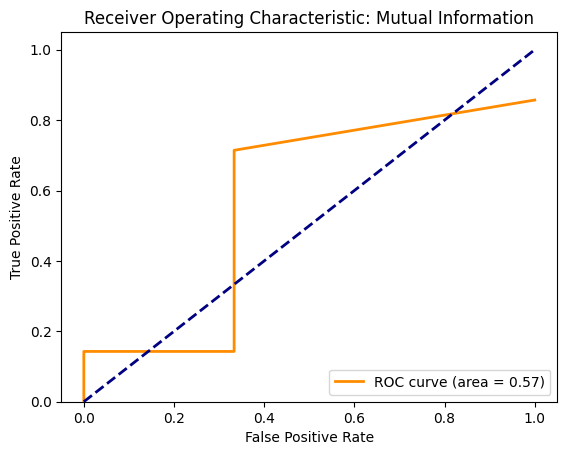

In [11]:
from src.visuals import plot_roc
from src.commons import calculate_confusion_matrix_from_model, apply_threshold

thresholds = np.linspace(0.0, 1.0, 20)
tprs, fprs = [], []
for th in thresholds:
    #matrix_filtered = apply_threshold(mi_matrix, th)
    matrix_filtered = mi_matrix[mi_matrix>=th].fillna(0)
    fpr, tpr = calculate_confusion_matrix_from_model(matrix_filtered, compare_aginst_switch_off_sereies=False, undirected_model=True)
    
    fprs.append(fpr)    
    tprs.append(tpr)

plot_roc(fprs, tprs, "Receiver Operating Characteristic: Mutual Information")

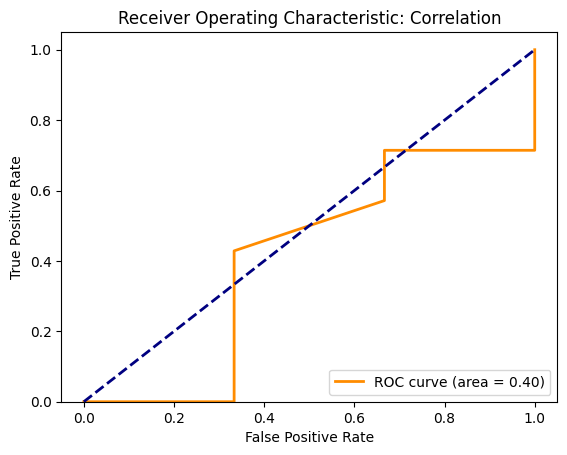

In [12]:
tprs, fprs = [], []
for th in thresholds:
    matrix_filtered = apply_threshold(correlation_matrix, th)
    fpr, tpr = calculate_confusion_matrix_from_model(matrix_filtered, compare_aginst_switch_off_sereies=False, undirected_model=True)
    fprs.append(fpr)    
    tprs.append(tpr)

plot_roc(fprs, tprs, "Receiver Operating Characteristic: Correlation")

In [13]:
from src.relevance_network import apply_aracne

dpi_threshold = 0.3  # Threshold for DPI
threshold = 0.0
aracne_result = apply_aracne(mi_matrix, threshold, dpi_threshold)
print(aracne_result)

[[1.65190632 0.         0.         0.30029651 0.        ]
 [0.         1.71440632 0.         0.         0.56039236]
 [0.         0.         1.59607299 0.26960474 0.        ]
 [0.30029651 0.         0.26960474 1.70190632 0.4727391 ]
 [0.         0.56039236 0.         0.4727391  1.71440632]]


# Gradient Estimation
Using brute force for all  possible ODE models.
PySINDy is a good library for that and will be used a lot

In [14]:
# Sadly the data is WAY too little. Let's fake 500 repeats of the same experiment with an unrealistic noise. In the future we would need to messure much more!
n_trajectories = 500
x_train_multi = []
for i in range(n_trajectories):
    x_train_multi.append(x_true + np.random.normal(0, 0.00001, x_true.shape))

In [26]:
# Define the library and identify all the features
library = ps.PolynomialLibrary()
library.fit([ps.AxesArray(x_true, {"ax_sample": 0, "ax_coord": 1})])
n_features = library.n_output_features_
print(f"Features ({n_features}):", library.get_feature_names())

Features (21): ['1', 'x0', 'x1', 'x2', 'x3', 'x4', 'x0^2', 'x0 x1', 'x0 x2', 'x0 x3', 'x0 x4', 'x1^2', 'x1 x2', 'x1 x3', 'x1 x4', 'x2^2', 'x2 x3', 'x2 x4', 'x3^2', 'x3 x4', 'x4^2']


In [37]:
# 1. Start of with an unconstrained model to establish a baseline, this is very over-fitted!
# ps.STLSQ(threshold=0.001) is the default optimizer. It uses a sparse regression to find the best model.
model_unconstrained = ps.SINDy(optimizer=ps.STLSQ(threshold=0.001), feature_library=library)
model_unconstrained.fit(x_true, t=1)
# model_unconstrained.fit(x_train_multi, t=dt, multiple_trajectories=True)
print("Unconstrained Model:")
model_unconstrained.print()

Unconstrained Model:
(x0)' = -0.054 1 + 3.013 x0 + 0.188 x1 + 1.089 x2 + 5.090 x3 + 0.512 x4 + -26.539 x0^2 + 40.165 x0 x1 + 189.804 x0 x2 + -555.316 x0 x3 + 60.602 x0 x4 + -9.736 x1 x4 + -142.088 x2 x4 + -63.912 x3 x4 + 22.536 x4^2
(x1)' = 0.001 1 + 1.261 x0 + 0.098 x1 + -0.403 x2 + -1.211 x4 + -40.492 x0^2 + -0.613 x0 x4 + 23.938 x4^2
(x2)' = -0.036 x0 + 0.304 x2 + -0.266 x3 + -0.025 x4 + -2.928 x0 x4 + 1.628 x4^2
(x3)' = -0.190 x0 + 0.021 x1 + 0.062 x2 + 0.211 x3 + -0.171 x4 + 1.715 x4^2
(x4)' = -0.088 1 + 2.336 x0 + 0.316 x1 + 3.566 x2 + 6.516 x3 + 2.086 x4 + -179.006 x0^2 + 81.262 x0 x1 + 533.382 x0 x2 + -825.383 x0 x3 + 181.307 x0 x4 + -34.795 x1 x4 + -355.141 x2 x4 + -99.197 x3 x4 + 41.394 x4^2


In [38]:
from src.pysindy_gradiet_estimation import process_coefficient_matrix

feature_biological_names = ["SWI5", "CBF1", "GAL4", "GAL80", "ASH1"]
coefficient_matrix = process_coefficient_matrix(model_unconstrained.coefficients(), feature_biological_names, library.get_feature_names())
fpr, tpr = calculate_confusion_matrix_from_model(coefficient_matrix, compare_aginst_switch_off_sereies=False, undirected_model=False)

In [39]:
tpr

1.0

In [32]:
coefficient_matrix

{'SWI5': [-0.0903803508591384,
  0.0,
  0.031507456388657554,
  0.01669256567343946,
  -0.32379740607744933],
 'CBF1': [-0.01840154060431908, 0.0, 0.0, 0.0, 0.0],
 'GAL4': [-0.016004997117553012, 0.0, 0.0, 0.0, 0.0021341476768847573],
 'GAL80': [0.0, 0.0, 0.0, 0.0, -0.0046307575948261225],
 'ASH1': [-0.04995924559694612,
  0.007045788910384931,
  -0.10508726365630054,
  0.10701149078944129,
  -0.41867837471169794]}

In [ ]:
model_true_model = {
    'SWI5': [None, 1, 0, 1, 1],
    'CBF1': [0, None, 1, 0, 0],
    'GAL4': [1, 0, None, -0.5, 0],
    'GAL80': [0, 0, -0.5, None, 0],
    'ASH1': [0, -1, 0, 0, None]
}

Model score against true model: 0.625903


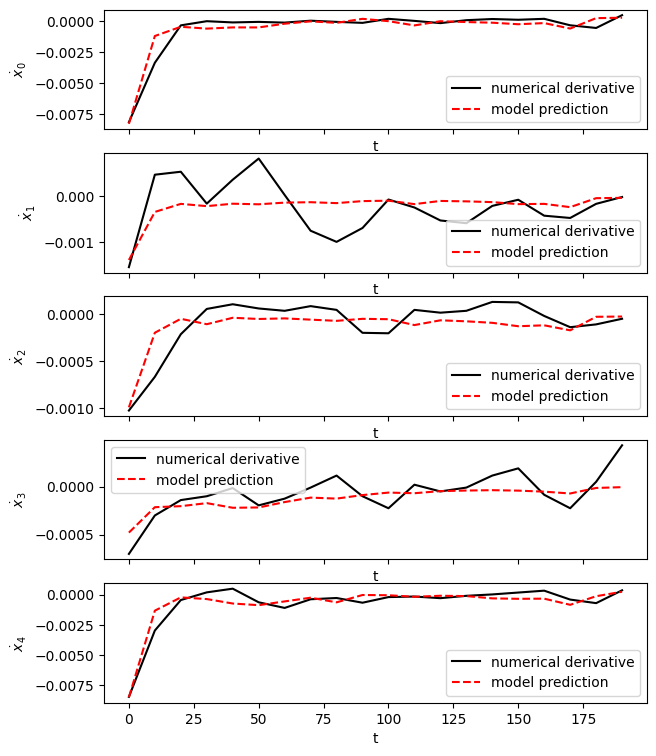

In [17]:
from src.visuals import plot_model_prediction

print("Model score against true model: %f" % model_unconstrained.score(x_true, t=dt))
plot_model_prediction(model_unconstrained, x_true, dt, max_time)

/Users/laabidn1/miniconda3/envs/mbn/lib/python3.12/site-packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.010526315789473684) and eliminated all coefficients
  warnings.warn(
/Users/laabidn1/miniconda3/envs/mbn/lib/python3.12/site-packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.010526315789473684) and eliminated all coefficients
  warnings.warn(
/Users/laabidn1/miniconda3/envs/mbn/lib/python3.12/site-packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.015789473684210527) and eliminated all coefficients
  warnings.warn(
/Users/laabidn1/miniconda3/envs/mbn/lib/python3.12/site-packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.015789473684210527) and eliminated all coefficients
  warnings.warn(
/Users/laabidn1/miniconda3/envs/mbn/lib/python3.12/site-packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.0157

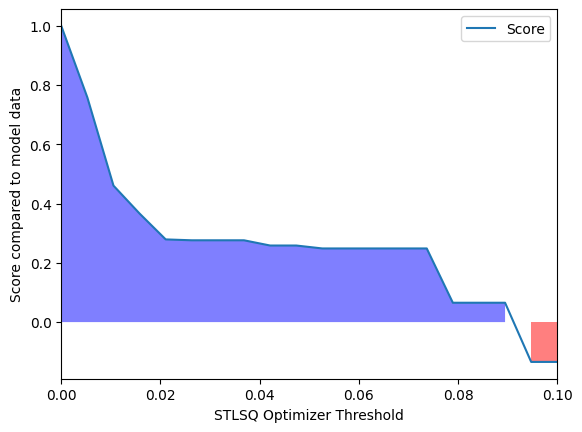

In [18]:
from src.visuals import plot_scores_over_threshold

# 2. Experiment with the threshold
threshold_scan = np.linspace(0, 0.1, 20)
scores = []
for i, threshold in enumerate(threshold_scan):
    optimizer = ps.STLSQ(threshold=threshold)
    model_threshold = ps.SINDy(optimizer=optimizer, feature_library=library)
    # model_threshold.fit(x_true, t=dt)
    model_threshold.fit(x_train_multi, t=dt, multiple_trajectories=True)
    scores.append(model_threshold.score(x_true, t=dt))

plot_scores_over_threshold(threshold_scan, scores)

/Users/laabidn1/miniconda3/envs/mbn/lib/python3.12/site-packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.0182) and eliminated all coefficients
  warnings.warn(
/Users/laabidn1/miniconda3/envs/mbn/lib/python3.12/site-packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.0182) and eliminated all coefficients
  warnings.warn(


Best threshold model:
(x0)' = -0.076 x0 + 0.033 x1 + -0.035 x4
(x1)' = -0.038 x0 + -0.041 x2 + 0.023 x4
(x2)' = 0.000
(x3)' = 0.000
(x4)' = -0.127 x0 + 0.065 x2
Model score against true model: 0.425627


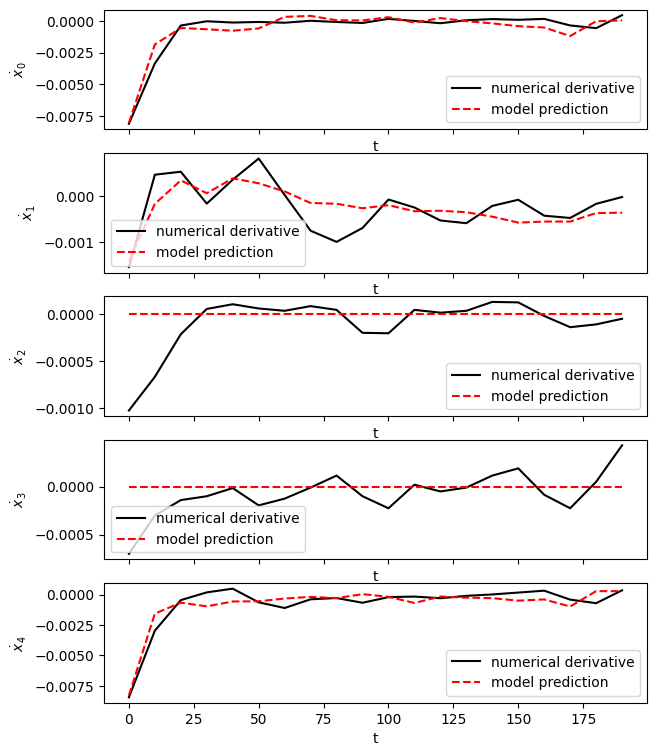

In [19]:
from src.visuals import create_graph_from_model, draw_graph, format_model_for_graph_plot

# Pick the "best" one manually and view it
model_threshold_best = ps.SINDy(optimizer=ps.STLSQ(threshold=0.0182), feature_library=library)
# model_threshold_best.fit(x_true, t=dt)
model_threshold_best.fit(x_train_multi, t=dt, multiple_trajectories=True)
print("Best threshold model:")
model_threshold_best.print()

print("Model score against true model: %f" % model_threshold_best.score(x_true, t=dt))
plot_model_prediction(model_threshold_best, x_true, dt, max_time)

(x0)' = -0.020 1 + -0.928 x0 + 0.207 x1 + 0.784 x2 + 3.876 x3 + -0.335 x4 + 4.596 x0^2 + 13.379 x0 x1 + 253.483 x0 x2 + -207.409 x0 x3 + 15.869 x0 x4 + -5.701 x1^2 + 24.543 x1 x2 + -56.952 x1 x3 + 21.130 x1 x4 + -305.316 x2^2 + 370.947 x2 x3 + -101.798 x2 x4 + -325.813 x3^2 + 171.694 x3 x4 + -31.922 x4^2
(x1)' = -0.015 1 + -3.310 x0 + -0.079 x1 + 6.846 x2 + -1.530 x3 + 0.599 x4 + 24.788 x0^2 + 51.131 x0 x1 + 408.925 x0 x2 + -143.428 x0 x3 + -42.704 x0 x4 + -2.109 x1^2 + -6.484 x1 x2 + -22.070 x1 x3 + 5.121 x1 x4 + -642.721 x2^2 + 253.310 x2 x3 + -38.557 x2 x4 + -3.987 x3^2 + 64.805 x3 x4 + -15.991 x4^2
(x2)' = -0.001 1 + 0.549 x0 + 0.026 x1 + -0.783 x2 + 0.663 x3 + -0.163 x4 + -4.504 x0^2 + -5.289 x0 x1 + -32.647 x0 x2 + -14.791 x0 x3 + 10.834 x0 x4 + -0.506 x1^2 + 7.635 x1 x2 + -4.718 x1 x3 + 2.189 x1 x4 + 43.710 x2^2 + 31.841 x2 x3 + -17.028 x2 x4 + -47.883 x3^2 + 15.145 x3 x4 + -0.833 x4^2
(x3)' = -0.497 x0 + -0.126 x1 + 0.986 x2 + -0.517 x3 + 0.233 x4 + 3.692 x0^2 + 9.892 x0 x1 + 6

/Users/laabidn1/miniconda3/envs/mbn/lib/python3.12/site-packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.007070707070707071) and eliminated all coefficients
  warnings.warn(
/Users/laabidn1/miniconda3/envs/mbn/lib/python3.12/site-packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.007070707070707071) and eliminated all coefficients
  warnings.warn(
/Users/laabidn1/miniconda3/envs/mbn/lib/python3.12/site-packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.00808080808080808) and eliminated all coefficients
  warnings.warn(
/Users/laabidn1/miniconda3/envs/mbn/lib/python3.12/site-packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.00808080808080808) and eliminated all coefficients
  warnings.warn(
/Users/laabidn1/miniconda3/envs/mbn/lib/python3.12/site-packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.009090

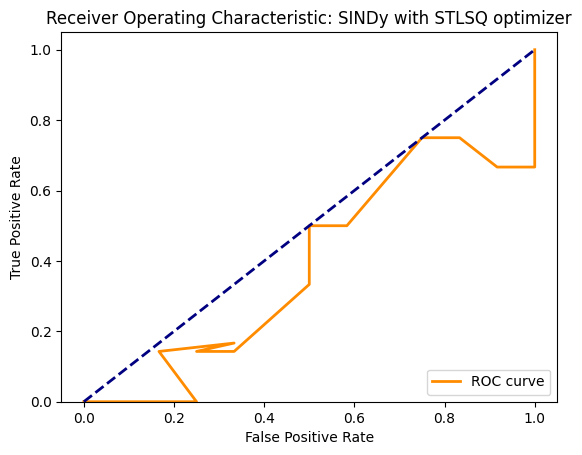

In [25]:
from src.pysindy_gradiet_estimation import process_coefficient_matrix

feature_biological_names = ["SWI5", "CBF1", "GAL4", "GAL80", "ASH1"]


threshold_scan = np.linspace(0.0, 0.1, 100)
fprs, tprs = [], []
for i, threshold in enumerate(threshold_scan):
    optimizer = ps.STLSQ(threshold=threshold)
    model_threshold = ps.SINDy(optimizer=optimizer, feature_library=library)
    # model_threshold.fit(x_true, t=dt)
    model_threshold.fit(x_train_multi, t=dt, multiple_trajectories=True)

    coefficient_matrix = process_coefficient_matrix(model_threshold.coefficients(), feature_biological_names, library.get_feature_names())
    fpr, tpr = calculate_confusion_matrix_from_model(coefficient_matrix, compare_aginst_switch_off_sereies=False, undirected_model=False)
    fprs.append(fpr)
    tprs.append(tpr)

plot_roc(fprs, tprs, "Receiver Operating Characteristic: SINDy with STLSQ optimizer")

Equality Constrained Model
(x0)' = 0.000
(x1)' = 0.000
(x2)' = 0.000
(x3)' = 0.000
(x4)' = 0.000
Model score against true model: -0.134411


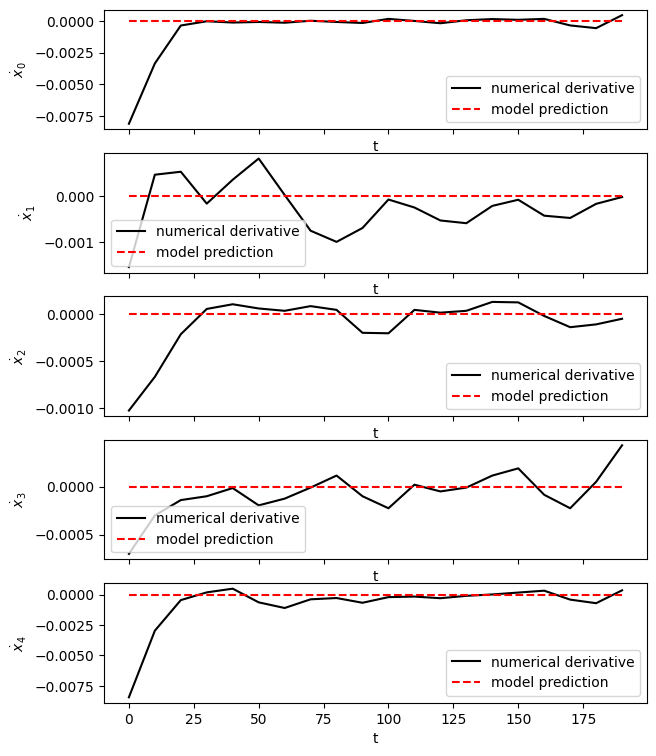

In [21]:
from src.pysindy_gradiet_estimation import translate_model_to_spare_array, pruned_model_optimizer_equality

rna_to_element_translation: dict = {"SWI5": "x0", "CBF1": "x1", "GAL4": "x2", "GAL80": "x3", "ASH1": "x4"}

model_equality_constrained_only_linear = {
    "SWI5": ["SWI5", "CBF1", "GAL4", "GAL80", "ASH1"],
    "CBF1": ["SWI5", "CBF1", "GAL4", "GAL80", "ASH1"],
    "GAL4": ["SWI5", "CBF1", "GAL4", "GAL80", "ASH1"],
    "GAL80": ["SWI5", "CBF1", "GAL4", "GAL80", "ASH1"],
    "ASH1": ["SWI5", "CBF1", "GAL4", "GAL80", "ASH1"]
}

model_equality_constrained_true_model = {
    "SWI5": ["GAL4"],
    "CBF1": ["SWI5", "ASH1"],
    "GAL4": ["CBF1", "GAL80"],
    "GAL80": ["SWI5"],
    "ASH1": ["SWI5"]
}

# Select which one to chose
selected_model = model_equality_constrained_true_model

translated_model = translate_model_to_spare_array(rna_to_element_translation, library.get_feature_names(),
                                                  selected_model)
# what kind of constraint does this model use? 
model_equality_constrained = ps.SINDy(
        optimizer=pruned_model_optimizer_equality(translated_model),
        feature_library=library
)
# model_equality_constrained.fit(x_true, t=dt)
model_equality_constrained.fit(x_train_multi, t=dt, multiple_trajectories=True)
print("Equality Constrained Model")
model_equality_constrained.print()
print("Model score against true model: %f" % model_equality_constrained.score(x_true, t=dt))
plot_model_prediction(model_equality_constrained, x_true, dt, max_time)


# Exhaustiv Search with Cross-Validation

In [22]:
from sklearn.metrics import r2_score


class SINDyCV(ps.SINDy):
    def __init__(
            self,
            optimizer=None,
            feature_library=None,
            differentiation_method=None,
            feature_names=None,
            t_default=1,
            discrete_time=False,
    ):
        super(SINDyCV, self).__init__(
                optimizer=optimizer,
                feature_library=feature_library,
                differentiation_method=differentiation_method,
                feature_names=feature_names,
                t_default=t_default,
                discrete_time=discrete_time,
        )

    def fit(self, x, y, **kwargs):
        return super(SINDyCV, self).fit(x, x_dot=y, **kwargs)

    def score(
            self,
            x,
            y,
            t=None,
            u=None,
            multiple_trajectories=False,
            metric=r2_score,
            **metric_kws
    ):
        return super(SINDyCV, self).score(
                x,
                x_dot=y,
                t=t,
                u=u,
                multiple_trajectories=multiple_trajectories,
                metric=metric,
                **metric_kws
        )

/Users/laabidn1/miniconda3/envs/mbn/lib/python3.12/site-packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.01) and eliminated all coefficients
  warnings.warn(
/Users/laabidn1/miniconda3/envs/mbn/lib/python3.12/site-packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.01) and eliminated all coefficients
  warnings.warn(
/Users/laabidn1/miniconda3/envs/mbn/lib/python3.12/site-packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.01) and eliminated all coefficients
  warnings.warn(
/Users/laabidn1/miniconda3/envs/mbn/lib/python3.12/site-packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.01) and eliminated all coefficients
  warnings.warn(
/Users/laabidn1/miniconda3/envs/mbn/lib/python3.12/site-packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.01) and eliminated all coefficients
  warnings.warn(
/Users/laabidn1

Best parameters: {'feature_library__degree': 1, 'optimizer__alpha': 0.001, 'optimizer__threshold': 0.02}
Best score: -0.06589640582883435
(x0)' = -0.076 x0 + 0.033 x1 + -0.035 x4
(x1)' = 0.000
(x2)' = 0.000
(x3)' = 0.000
(x4)' = -0.100 x0


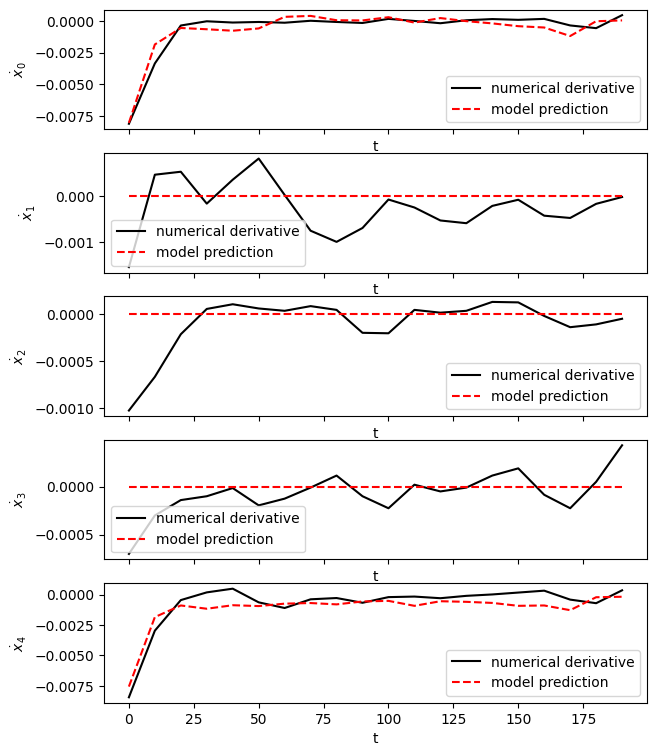

In [23]:
from sklearn.model_selection import ShuffleSplit, GridSearchCV, KFold

KFold(n_splits=10)

model = SINDyCV()
x_dot = model.differentiate(x_true, t=t_data)

param_grid = {
    "optimizer__threshold": [0.0, 0.0001, 0.001, 0.01, 0.015, 0.02],
    "optimizer__alpha": [0.00001, 0.001, 0.005, 0.01, 0.05, 0.1, 0],
    "feature_library__degree": [1, 2 ],
}

search = GridSearchCV(
        model,
        param_grid,
        cv=ShuffleSplit(n_splits=5, test_size=0.7)
)
search.fit(x_true, y=x_dot)
print("Best parameters:", search.best_params_)
print("Best score:", search.best_score_)
search.best_estimator_.print()

plot_model_prediction(search.best_estimator_, x_true, dt, max_time)